In [14]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [15]:

Salaries = pd.read_csv("../ISLP_Labs/Salaries.csv")
Salaries.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [21]:
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rownames       397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


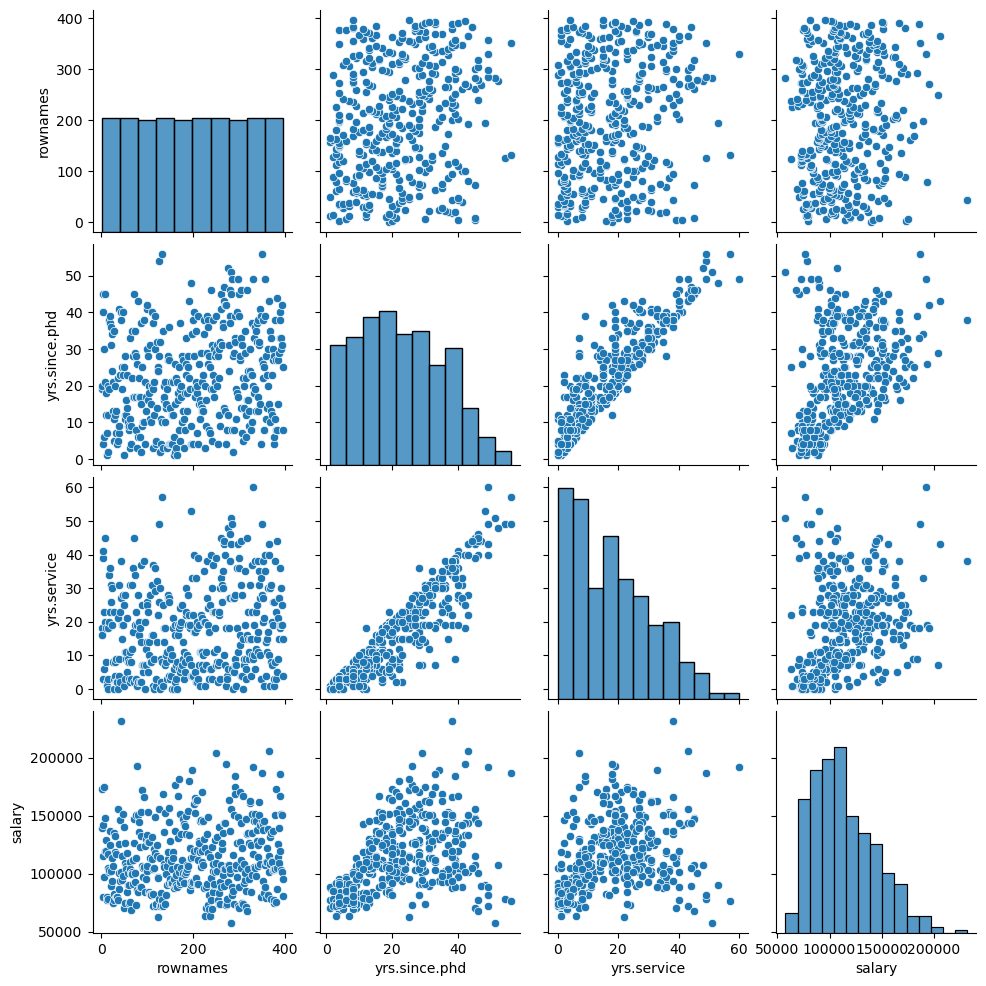

In [4]:
sns.pairplot(Salaries)

In [43]:
# One Hot Encoding
Salaries_encoded = pd.get_dummies(Salaries, columns=['sex'])
Salaries_encoded.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,salary,sex_Female,sex_Male
0,1,Prof,B,19,18,139750,False,True
1,2,Prof,B,20,16,173200,False,True
2,3,AsstProf,B,4,3,79750,False,True
3,4,Prof,B,45,39,115000,False,True
4,5,Prof,B,40,41,141500,False,True


In [41]:
# One Hot Encoding
Salaries_encoded = pd.get_dummies(Salaries, columns=['rank','sex'])
print(Salaries_encoded)

     rownames discipline  yrs.since.phd  yrs.service  salary  rank_AssocProf  \
0           1          B             19           18  139750           False   
1           2          B             20           16  173200           False   
2           3          B              4            3   79750           False   
3           4          B             45           39  115000           False   
4           5          B             40           41  141500           False   
..        ...        ...            ...          ...     ...             ...   
392       393          A             33           30  103106           False   
393       394          A             31           19  150564           False   
394       395          A             42           25  101738           False   
395       396          A             25           15   95329           False   
396       397          A              8            4   81035           False   

     rank_AsstProf  rank_Prof  sex_Fema

In [44]:
X = Salaries[['yrs.service', 'yrs.since.phd']]
y = Salaries['salary']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for rank_AssocProf: {lr_model.coef_[0]}")
print(f"Coefficient for rank_AsstProf: {lr_model.coef_[1]}")
#print(f"Coefficient for rank_Prof: {lr_model.coef_[2]}")
#print(f"Coefficient for sex_Male: {lr_model.coef_[2]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: 87992.49716510219
Coefficient for rank_AssocProf: -440.00565499543086
Coefficient for rank_AsstProf: 1513.0542435237442
Test Mean Squared Error: 767264567.1857628


In [45]:
X = Salaries_encoded[['sex_Male']]
y = Salaries['salary']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for sex_Male: {lr_model.coef_[0]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: 99422.14814814812
Coefficient for sex_Male: 16071.448403576022
Test Mean Squared Error: 765957290.1672219


In [37]:
# Split in Input- und Outputvariable
#X = Salaries_encoded[['rank_AssocProf', 'rank_AsstProf', 'rank_Prof', 'sex_Male']]
X = Salaries_encoded[['yrs.since.phd','rank_AssocProf', 'rank_AsstProf', 'rank_Prof', 'sex_Male']]
y = Salaries['salary']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for yrs.since.phd: {lr_model.coef_[0]}")
print(f"Coefficient for rank_AssocProf: {lr_model.coef_[1]}")
print(f"Coefficient for rank_AsstProf: {lr_model.coef_[2]}")
print(f"Coefficient for rank_Prof: {lr_model.coef_[3]}")
print(f"Coefficient for sex_Male: {lr_model.coef_[4]}")


mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")



Intercept: 94027.19918473146
Coefficient for yrs.service: 10.034980226026866
Coefficient for rank_AssocProf: -6536.963977764033
Coefficient for rank_AsstProf: -19660.44183155139
Coefficient for rank_Prof: 26197.4058093154
Coefficient for sex_Male: 6931.375674302067
Test Mean Squared Error: 457094197.56995374


     rownames discipline  yrs.since.phd  yrs.service  salary  rank_AssocProf  \
0           1          B             19           18  139750           False   
1           2          B             20           16  173200           False   
2           3          B              4            3   79750           False   
3           4          B             45           39  115000           False   
4           5          B             40           41  141500           False   
..        ...        ...            ...          ...     ...             ...   
392       393          A             33           30  103106           False   
393       394          A             31           19  150564           False   
394       395          A             42           25  101738           False   
395       396          A             25           15   95329           False   
396       397          A              8            4   81035           False   

     rank_AsstProf  rank_Prof  sex_Fema